# Effect of Random Prompts

In [7]:
# Imports 
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
sns.set_style("ticks")
sns.set_palette(sns.color_palette("bright", 11))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
params = {'legend.fontsize': 12}
plot.rcParams.update(params)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)

### Moral Foundations 30 Questions

In [8]:
questions1 = ["Whether or not someone suffered emotionally.",
              "Whether or not some people were treated differently than others.",
              "Whether or not someone’s action showed love for his or her country.",
              "Whether or not someone showed a lack of respect for authority.",
              "Whether or not someone violated standards of purity and decency."
              "Whether or not someone was good at math,",
              "Whether or not someone cared for someone weak or vulnerable",
              "Whether or not someone acted unfairly",
              "Whether or not someone did something to betray his or her group",
              "Whether or not someone conformed to the traditions of society",
              "Whether or not someone did something disgusting",
              "Whether or not someone was cruel",
              "Whether or not someone was denied his or her rights",
              "Whether or not someone showed a lack of loyalty",
              "Whether or not an action caused chaos or disorder",
              "Whether or not someone acted in a way that God would approve of"]

questions2 = ["Compassion for those who are suffering is the most crucial virtue.",
              "When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.", 
              "I am proud of my country’s history.",
              "Respect for authority is something all children need to learn.", 
              "People should not do things that are disgusting, even if no one is harmed.",
              "It is better to do good than to do bad.",
              "One of the worst things a person could do is hurt a defenseless animal.",
              "Justice is the most important requirement for a society.",
              "People should be loyal to their family members, even when they have done something wrong.",
              "Men and women each have different roles to play in society.",
              "I would call some acts wrong on the grounds that they are unnatural.",
              "It can never be right to kill a human being.",
              "I think it’s morally wrong that rich children inherit a lot of money while poor children inherit nothing.",
              "It is more important to be a team player than to express oneself.",
              "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.",
              "Chastity is an important and valuable virtue."]

In [9]:
# Test 1 
emotionally = 0
weak = 6
cruel = 11

# Fairness
treated = 1
unfairly = 7
rights = 12

# Ingroup:
lovecountry = 2
betray = 8
loyalty = 13

# Authority
respect = 3
traditions = 9 
chaos =  14

# Purity
decency = 4
disgusting = 10
god = 15

# tests
math = 5
good = 5

In [10]:
# Test 2 
constant = 15
# Harm 
compassion = 0 + constant
animal = 6 + constant
kill = 11 + constant

# Fairness
fairly = 1 + constant
justice = 7 + constant
rich = 12 + constant

# Ingroup:
history = 2 + constant
family = 8 + constant 
team = 13 + constant 

# Authority
kidrespect = 3 + constant 
sexroles = 9  + constant 
soldier =  14 + constant 

# Purity
harmlessdg = 4 + constant 
unnatural = 10 + constant 
chastity = 15 + constant 

# tests
math = 5 
good = 5 + constant 

In [11]:
# Moral Foundations Questionnaire syntax for calculating foundation scores for MFQ30, August 22 2008.
def compute_mfq(values):
    MFQ_HARM_AVG = torch.mean(torch.stack([values[emotionally],values[weak],values[cruel],values[animal],values[kill],values[compassion]]), dim=0)
    MFQ_FAIRNESS_AVG = torch.mean(torch.stack([values[rights],values[unfairly],values[treated],values[justice],values[fairly],values[rich]]), dim=0)
    MFQ_INGROUP_AVG = torch.mean(torch.stack([values[loyalty],values[betray],values[lovecountry],values[team],values[history],values[family]]), dim=0)
    MFQ_AUTHORITY_AVG = torch.mean(torch.stack([values[traditions],values[respect],values[chaos],values[sexroles],values[soldier],values[kidrespect]]), dim=0)
    MFQ_PURITY_AVG = torch.mean(torch.stack([values[disgusting],values[decency],values[god],values[harmlessdg],values[unnatural],values[chastity]]), dim=0)
    MFQ_PROGRESSIVISM = torch.mean(torch.stack([MFQ_HARM_AVG, MFQ_FAIRNESS_AVG])) - torch.mean(torch.stack([MFQ_INGROUP_AVG, MFQ_AUTHORITY_AVG, MFQ_PURITY_AVG]), dim=0)
    return MFQ_HARM_AVG, MFQ_FAIRNESS_AVG, MFQ_INGROUP_AVG, MFQ_AUTHORITY_AVG, MFQ_PURITY_AVG, MFQ_PROGRESSIVISM

In [13]:
import pickle
import torch
import numpy
seed = 14
file_location = "text-davinci-002/engine_text-davinci-002_prompt_" 

value_labels = ["Harm", "Fairness", "Ingroup", "Authority", "Purity"]
acc = []
for i in range(seed):
    file = file_location + str(i) + ".pkl"
    with open(file, 'rb') as f:
        data = pickle.load(f)
    
    x = [[int(float(j)) for j in i] for i in data]

    answers_mean = torch.mode(torch.tensor(x).to(torch.float64), dim=1)[0]
    answers_std = torch.mode(torch.tensor(x).to(torch.float64), dim=1)[1]

    values_avg = compute_mfq(answers_mean)
    acc.append(values_avg)
       
mean_values = np.mean(acc, axis=0)[0:5]
std_values = np.std(acc, axis=0)[0:5]

RANDOM EXPERIMENTS


In [14]:
a = numpy.array(acc[:5])
a.shape

(5, 6)

(0.0, 5.0)

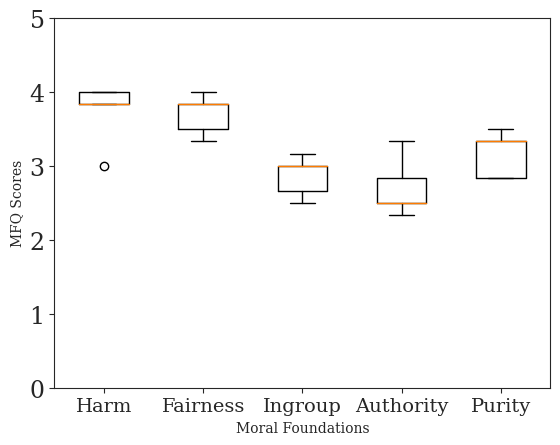

In [15]:
B = plt.boxplot(a[:, :5])
plt.xticks(range(1,6,1), value_labels, size=14)
whiskerprops={'color' : 'tab:blue'}, 
plt.xlabel("Moral Foundations")
plt.ylabel("MFQ Scores")
plt.ylim([0,5])
